<a href="https://colab.research.google.com/github/manishaachary13/Airline_referral_prediction/blob/main/Airline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 **Project Title: Airline Passenger Referral Prediction** ✈️

## **Project Description**

The airline industry is highly competitive, and customer referrals play a major role in influencing brand reputation and business growth. This project aims to predict whether a passenger will **recommend an airline** based on their flight experience.

By analyzing** customer ratings, flight details, and text reviews**, we will build a machine learning model that helps airlines understand what factors drive customer referrals.

## **Business Problem & Objective** 📊

🔹 Business Context:

Airlines rely heavily on positive customer experiences to build brand loyalty.

Identifying key drivers of referral behavior helps airlines improve services and reduce negative feedback.

🔹 Business Objective:

Predict whether a passenger will refer an airline based on their experience.

Compare customer satisfaction trends across different airlines.

Help airlines optimize their service offerings to increase positive referrals.


Project Objective

🔹 Primary Goal:

Develop a machine learning model to predict passenger referral likelihood using structured ratings and unstructured text reviews.

🔹 Secondary Goals:
✅ Perform Exploratory Data Analysis (EDA) to uncover customer satisfaction trends.
✅ Compare airlines to identify top performers vs. low performers.
✅ Analyze sentiment in customer reviews for deeper insights.
✅ Provide business recommendations for improving airline services.

Why Is This Project Important?

💡 For Airlines:

Helps in improving customer experience based on data-driven insights.

Reduces negative feedback & enhances brand reputation.

Increases customer loyalty and repeat bookings.

💡 For Data Science & AI Industry:

Combines structured data (ratings) & unstructured data (text reviews).

Uses Natural Language Processing (NLP) + Machine Learning, making it an advanced AI solution.

Can be extended to other businesses like hotels, e-commerce, and banking.

Key Project Deliverables

📌 Data Preprocessing & Cleaning → Handle missing values, feature engineering
📌 EDA & Sentiment Analysis → Extract key customer insights
📌 Machine Learning Model → Predict referral likelihood with high accuracy
📌 Model Explainability (SHAP, Feature Importance) → Understand key factors
📌 Business Report & Recommendations → Data-driven insights for airlines
📌 Interactive Dashboard (Power BI/Tableau) → Visualize trends across airlines

##

In [65]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [42]:


# GitHub raw file URL (Modify this with the correct raw file link)
github_url = "https://raw.githubusercontent.com/manishaachary13/Airline_referral_prediction/main/data_airline_reviews.xlsx"

# Load the dataset from GitHub
try:
    airline = pd.read_excel(github_url)
except Exception as e:
    e



In [43]:
airline.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
airline.shape

(131895, 17)

In [45]:
airline.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [46]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [47]:
airline.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [48]:
airline.duplicated().sum()

np.int64(70711)

In [49]:
missing_values = airline.isnull().sum()

In [50]:
missing_values

,0
airline,65948
overall,67878
author,65948
review_date,65948
customer_review,65948
aircraft,112177
traveller_type,92140
cabin,68592
route,92169
date_flown,92262


<ipython-input-51-ab1caa55baa9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=missing_percentage, y=missing_percentage.index, palette="magma")


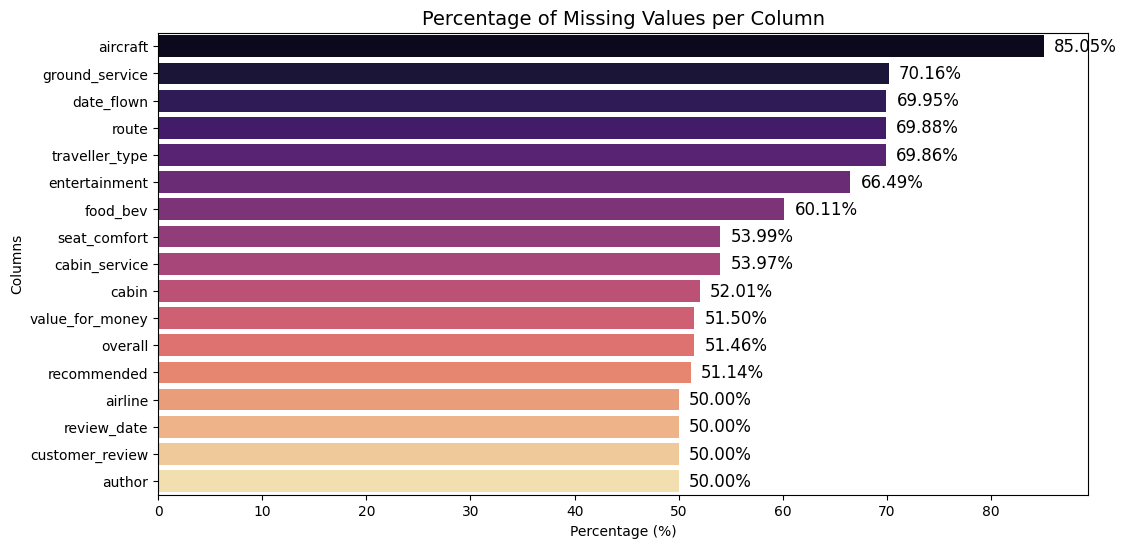

In [51]:
# Bar plot of missing values percentage
# Set plot size
plt.figure(figsize=(12, 6))

# Calculate missing value percentage
missing_percentage = (airline.isnull().sum() / len(airline)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Create bar plot
ax = sns.barplot(x=missing_percentage, y=missing_percentage.index, palette="magma")

# Add percentage labels on bars
for index, value in enumerate(missing_percentage):
    ax.text(value + 1, index, f"{value:.2f}%", va="center", fontsize=12)

# Add labels and title
plt.title("Percentage of Missing Values per Column", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Columns")

# Show the plot
plt.show()



In [52]:
airline.nunique()

,0
airline,81
overall,10
author,44069
review_date,3015
customer_review,61172
aircraft,2088
traveller_type,4
cabin,4
route,24549
date_flown,63


In [53]:
airline.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

## What we have done so far?

1️⃣ Dataset Shape: (131,895 rows, 17 columns)

2️⃣ Columns Present: 17 (includes airline, overall, customer_review, traveller_type, etc.)

3️⃣ Data Types:
* Numerical Columns: Ratings (overall, seat_comfort, cabin_service, etc.)
* Categorical Columns: airline, traveller_type, cabin, recommended
* Text Columns: customer_review (for sentiment analysis)

4️⃣ Missing Values:
* Some columns have a large percentage of missing values (e.g., aircraft, route, date_flown).
* Some are partially missing but still usable (seat_comfort, cabin_service).

5️⃣ Duplicates: 70,711 duplicate rows detected

6️⃣ Unique Values Count:
* airline: 81 unique airlines
* traveller_type: 4 categories
* route: 24,549 unique routes
* recommended: Binary classification (Yes/No)

In [54]:
airline_df = airline.drop_duplicates()

In [55]:
airline_df.shape

(61184, 17)

In [56]:
# Calculate the percentage of missing values
missing_percent = (airline_df.isnull().sum() / len(airline_df)) * 100

# Select columns with more than 70% missing values
cols_to_drop = missing_percent[missing_percent > 70].index

# Drop these columns
df_cleaned = airline_df.drop(columns=cols_to_drop)

# Display new shape after dropping columns
df_cleaned.shape, cols_to_drop


((61184, 17), Index([], dtype='object'))

In [57]:
# 2️⃣ Impute missing values for numerical columns using median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# 3️⃣ Fill missing categorical values with the most frequent category (mode)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [58]:
df_cleaned.shape

(61184, 17)

In [59]:

# Check if there are any missing values left
missing_values_after = df_cleaned.isnull().sum().sum()
df_cleaned.shape, missing_values_after

((61184, 17), np.int64(0))

In [60]:
df_cleaned.dtypes

,0
airline,object
overall,float64
author,object
review_date,object
customer_review,object
aircraft,object
traveller_type,object
cabin,object
route,object
date_flown,object


In [61]:
# Convert date columns to datetime format
df_cleaned['review_date'] = pd.to_datetime(df_cleaned['review_date'], errors='coerce')
df_cleaned['date_flown'] = pd.to_datetime(df_cleaned['date_flown'], errors='coerce')
# Extract year from 'date_flown' column
df_cleaned['year_flown'] = df_cleaned['date_flown'].dt.year


# Find the most common year
most_frequent_year = df_cleaned['year_flown'].mode()[0]
# Fill NaN values with the most frequent year
df_cleaned['year_flown'].fillna(most_frequent_year, inplace=True)

# Convert to integer
df_cleaned['year_flown'] = df_cleaned['year_flown'].astype(int)


<ipython-input-61-20fc5a7ca5a7>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['date_flown'] = pd.to_datetime(df_cleaned['date_flown'], errors='coerce')
<ipython-input-61-20fc5a7ca5a7>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['year_flown'].fillna(most_frequent_year, inplace=True)


In [64]:
df_cleaned['recommended'] = df_cleaned['recommended'].replace({'yes': 1, 'no': 0})
df_cleaned['recommended'].value_counts()

,count
recommended,
0,32691
1,28493


In [63]:
df_cleaned.shape

(61184, 18)

<ipython-input-79-aef02bf95d12>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette=['red', 'green'])


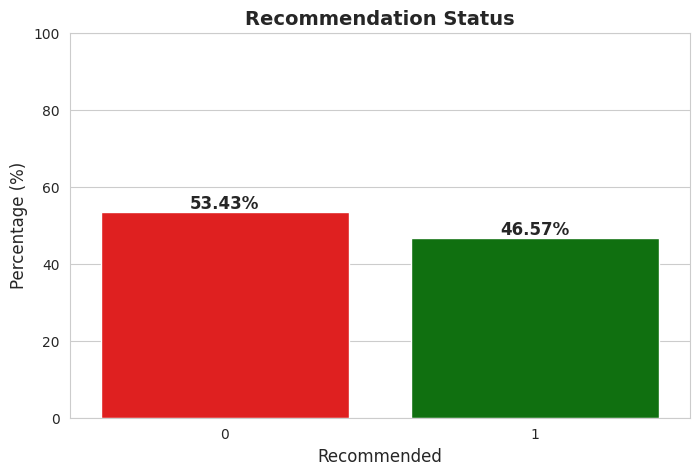

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the recommendations
recommend_counts = df_cleaned['recommended'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette=['red', 'green'])

# Add percentage labels
for i, v in enumerate(recommend_counts.values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.title("Recommendation Status", fontsize=14, fontweight='bold')
plt.xlabel("Recommended", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)
plt.show()


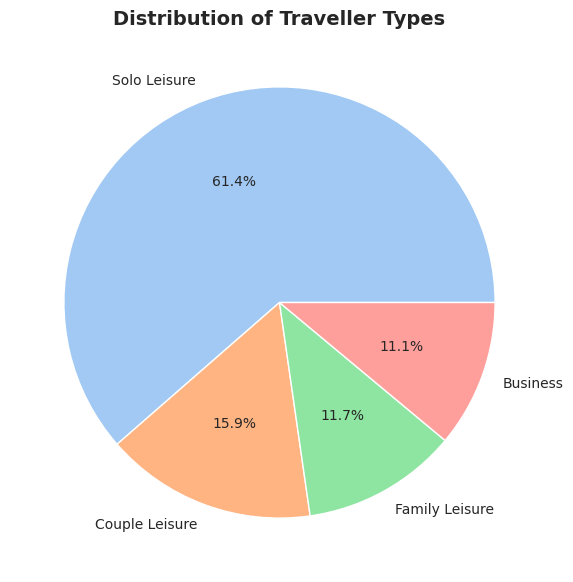

In [80]:
# Count the traveller types
traveller_counts = df_cleaned['traveller_type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(traveller_counts, labels=traveller_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))

plt.title("Distribution of Traveller Types", fontsize=14, fontweight='bold')
plt.show()


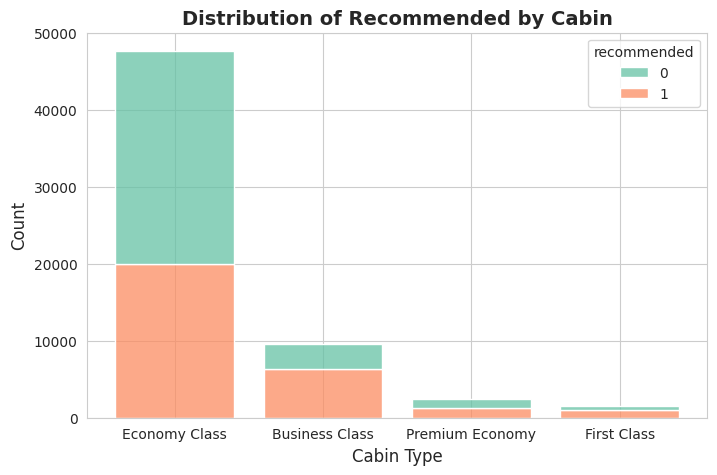

In [81]:
# Create a stacked bar chart for recommendation status by cabin
plt.figure(figsize=(8, 5))
sns.histplot(data=df_cleaned, x="cabin", hue="recommended", multiple="stack", shrink=0.8, palette="Set2")

plt.title("Distribution of Recommended by Cabin", fontsize=14, fontweight='bold')
plt.xlabel("Cabin Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


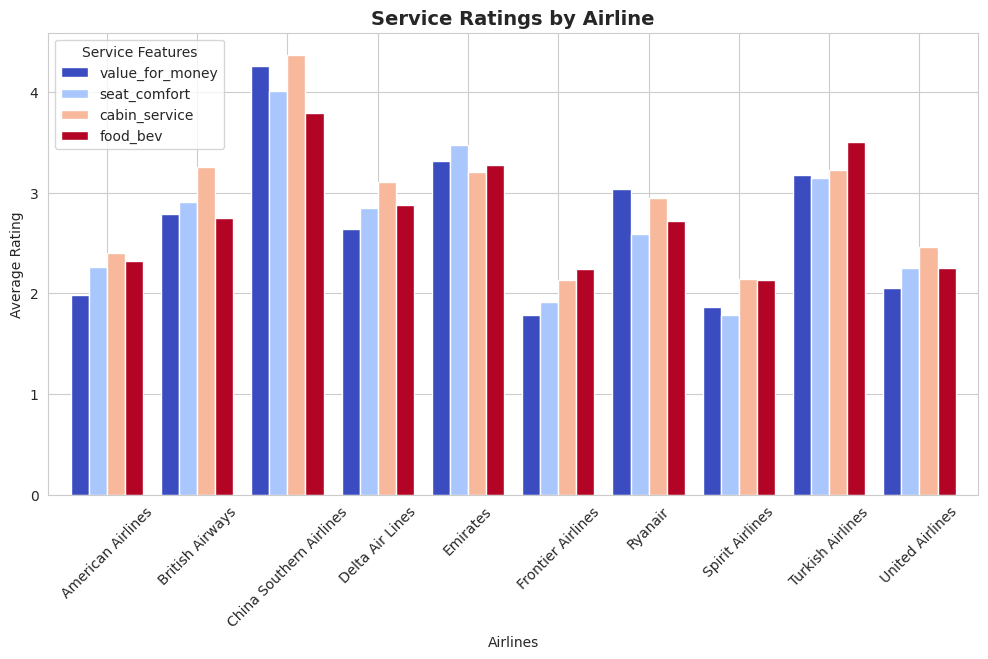

In [82]:
# Select top airlines
top_airlines = df_cleaned['airline'].value_counts().nlargest(10).index
df_top = df_cleaned[df_cleaned['airline'].isin(top_airlines)]

# Aggregate ratings
ratings = df_top.groupby('airline')[['value_for_money', 'seat_comfort', 'cabin_service', 'food_bev']].mean()

# Plot grouped bar chart
ratings.plot(kind='bar', figsize=(12, 6), colormap="coolwarm", width=0.8)
plt.title("Service Ratings by Airline", fontsize=14, fontweight='bold')
plt.ylabel("Average Rating")
plt.xlabel("Airlines")
plt.xticks(rotation=45)
plt.legend(title="Service Features")
plt.show()


<ipython-input-84-5ee722f68563>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="airline", y="overall", palette="coolwarm")


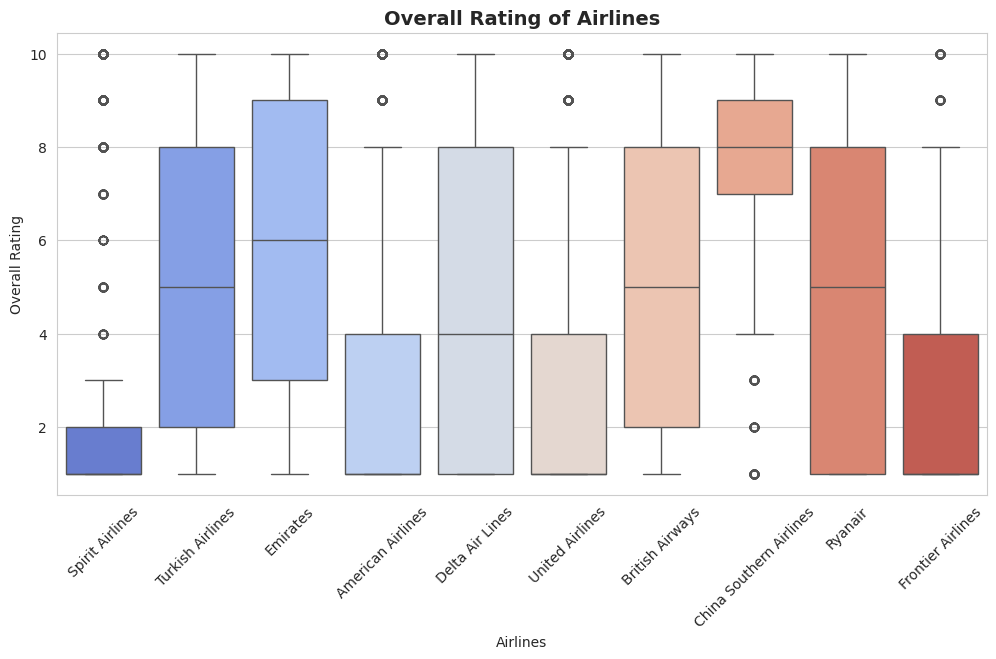

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="airline", y="overall", palette="coolwarm")

plt.title("Overall Rating of Airlines", fontsize=14, fontweight='bold')
plt.xlabel("Airlines")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()


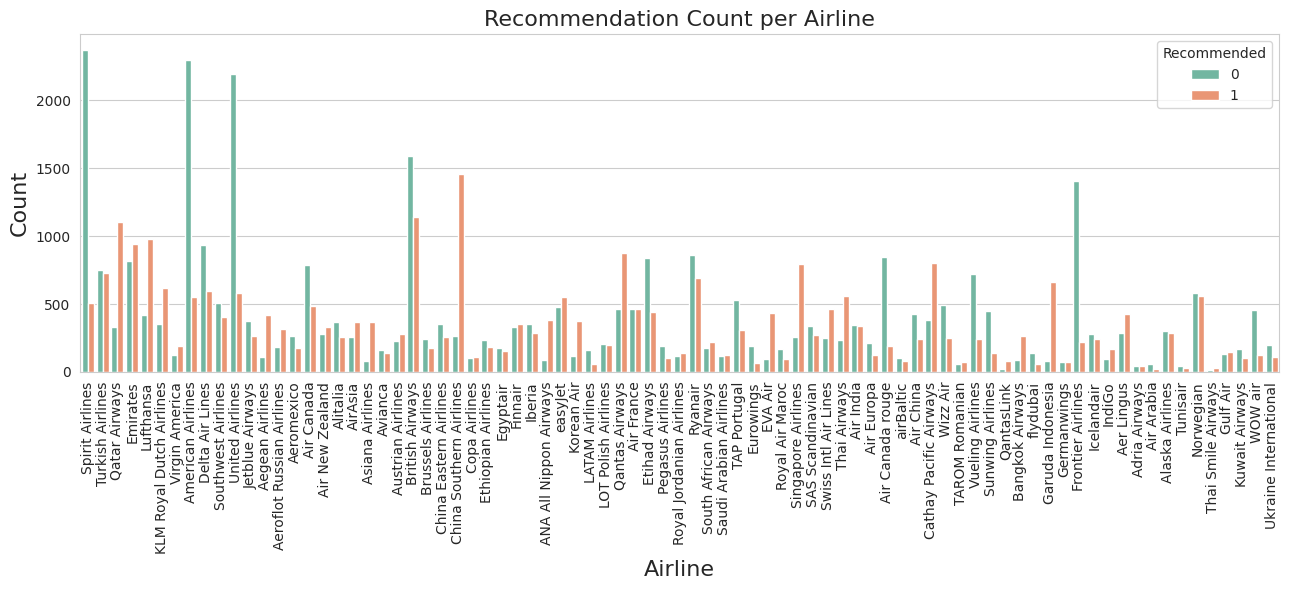

In [92]:
plt.figure(figsize=(13, 6))
sns.countplot(x='airline', hue='recommended', data=df_cleaned,palette='Set2')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Airline',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Recommendation Count per Airline',fontsize=16)
plt.legend(title='Recommended')
plt.tight_layout()
plt.show()

<ipython-input-87-6d9e168924a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cabin_ratings.index, y=cabin_ratings.values, palette="viridis")


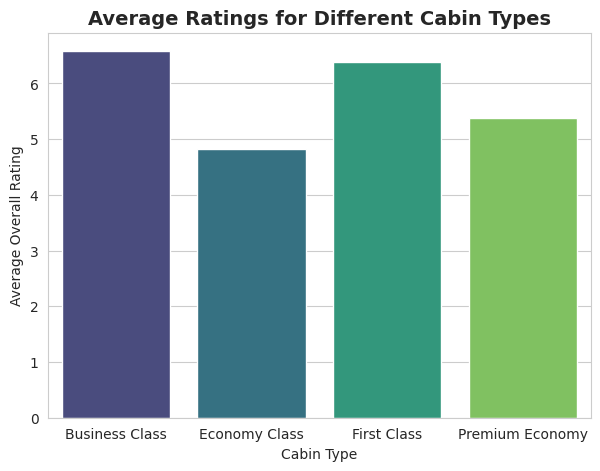

In [87]:
# Average rating by cabin type
cabin_ratings = df_cleaned.groupby("cabin")["overall"].mean()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=cabin_ratings.index, y=cabin_ratings.values, palette="viridis")

plt.title("Average Ratings for Different Cabin Types", fontsize=14, fontweight='bold')
plt.ylabel("Average Overall Rating")
plt.xlabel("Cabin Type")
plt.show()


<ipython-input-93-d46f79f99a8a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_routes.index, y=top_20_routes.values, palette='viridis')


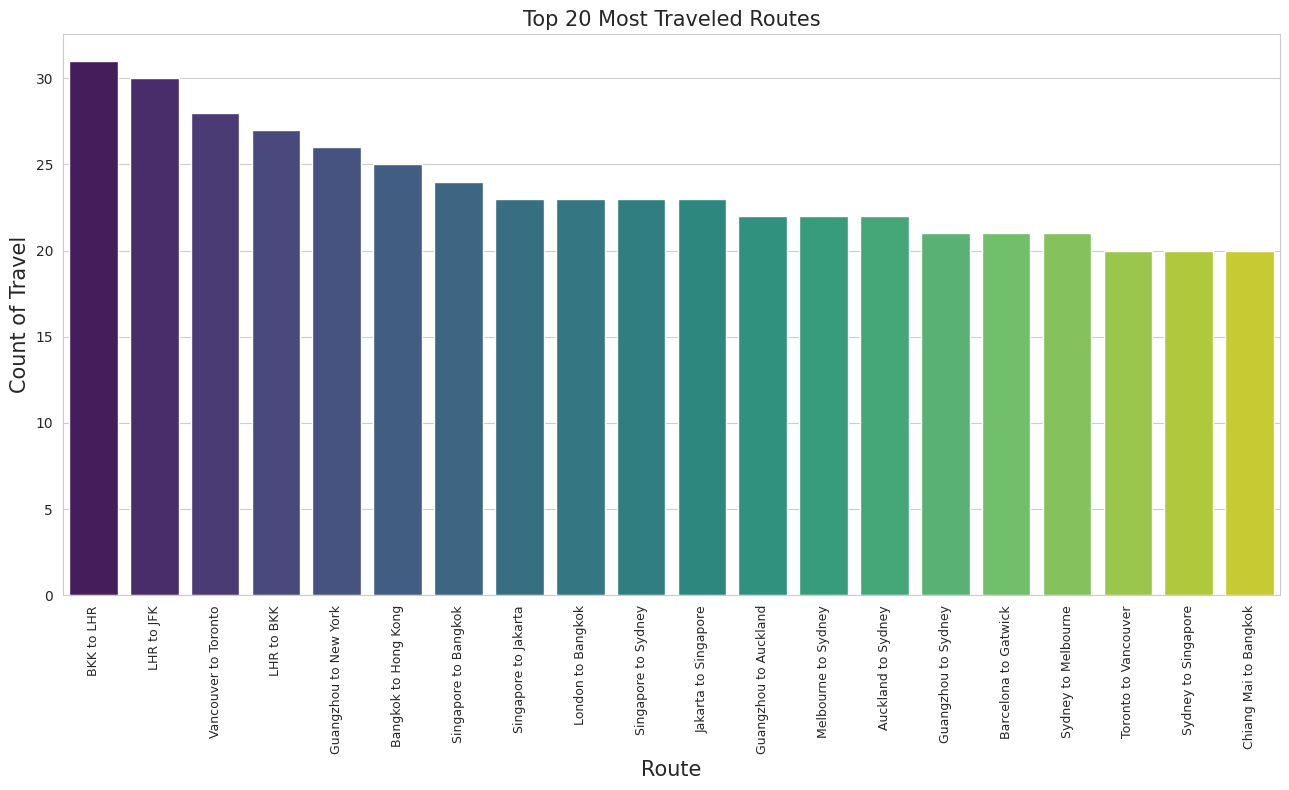

In [93]:
# Count top 20 routes
# Count the occurrences of each unique route
route_counts = airline_df['route'].value_counts()

# Select the top 50 most traveled routes
top_20_routes = route_counts.head(20)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a bar plot for the top 10 most traveled routes
sns.barplot(x=top_20_routes.index, y=top_20_routes.values, palette='viridis')

plt.xlabel('Route',fontsize=15)
plt.ylabel('Count of Travel',fontsize=15)
plt.title('Top 20 Most Traveled Routes',fontsize=15)
plt.xticks(rotation=90,fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


<ipython-input-94-b700b2cf762d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='airline', y='route', data=airline_route_counts, palette='viridis')


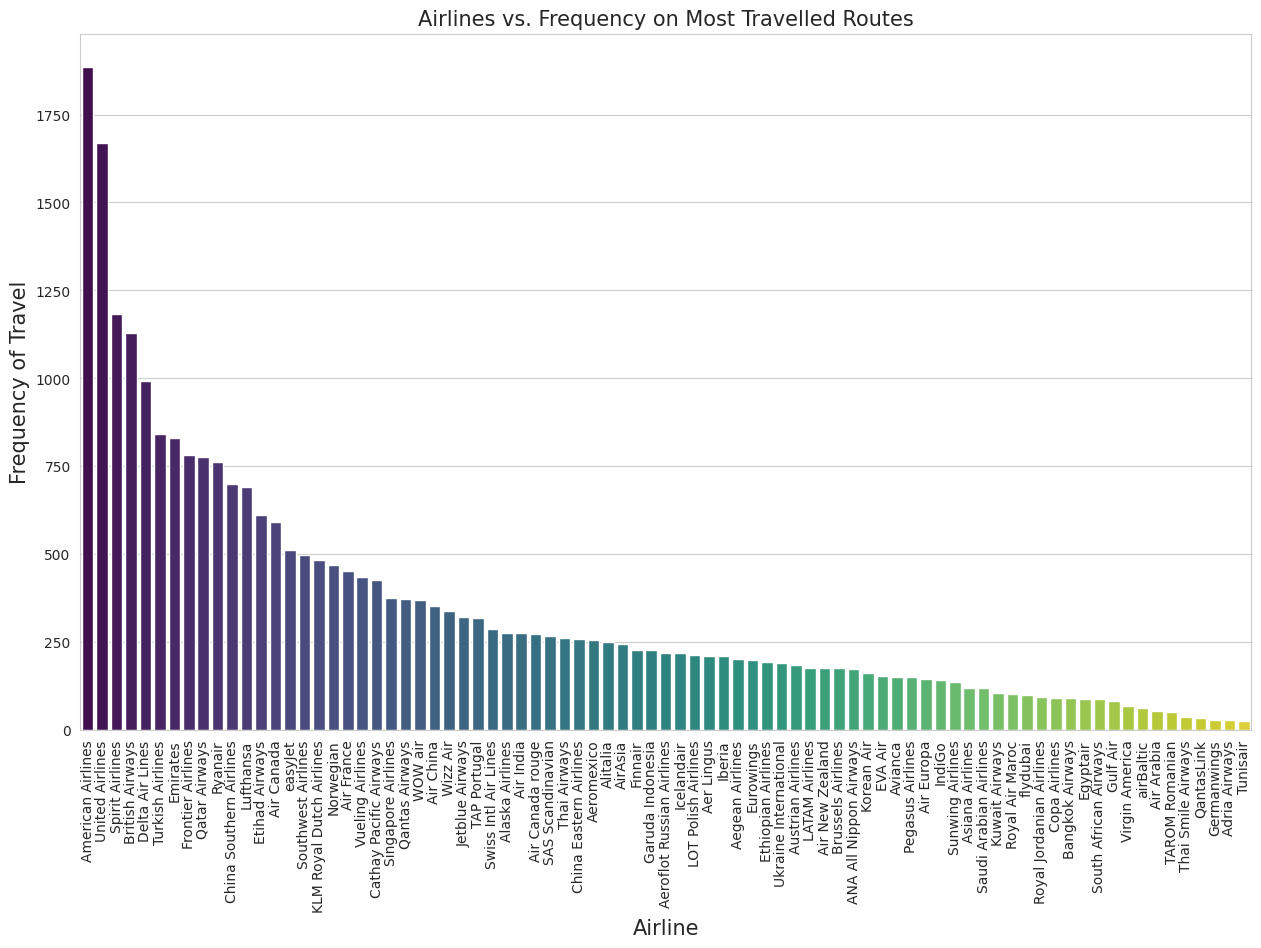

In [94]:
# Count the number of unique routes traveled by each airline
airline_route_counts = df_cleaned.groupby('airline')['route'].nunique().reset_index()

# Sort the airlines by the number of routes in descending order
airline_route_counts = airline_route_counts.sort_values(by='route', ascending=False)

# Set the figure size
plt.figure(figsize=(13, 8))

# Create a count plot for airlines and the number of routes traveled
sns.barplot(x='airline', y='route', data=airline_route_counts, palette='viridis')

plt.xlabel('Airline',fontsize=15)
plt.ylabel('Frequency of Travel',fontsize=15)
plt.title('Airlines vs. Frequency on Most Travelled Routes',fontsize=15)

# Show the plot
plt.tight_layout()
plt.xticks(rotation=90,fontsize=10)
plt.show()

<Figure size 1200x600 with 0 Axes>

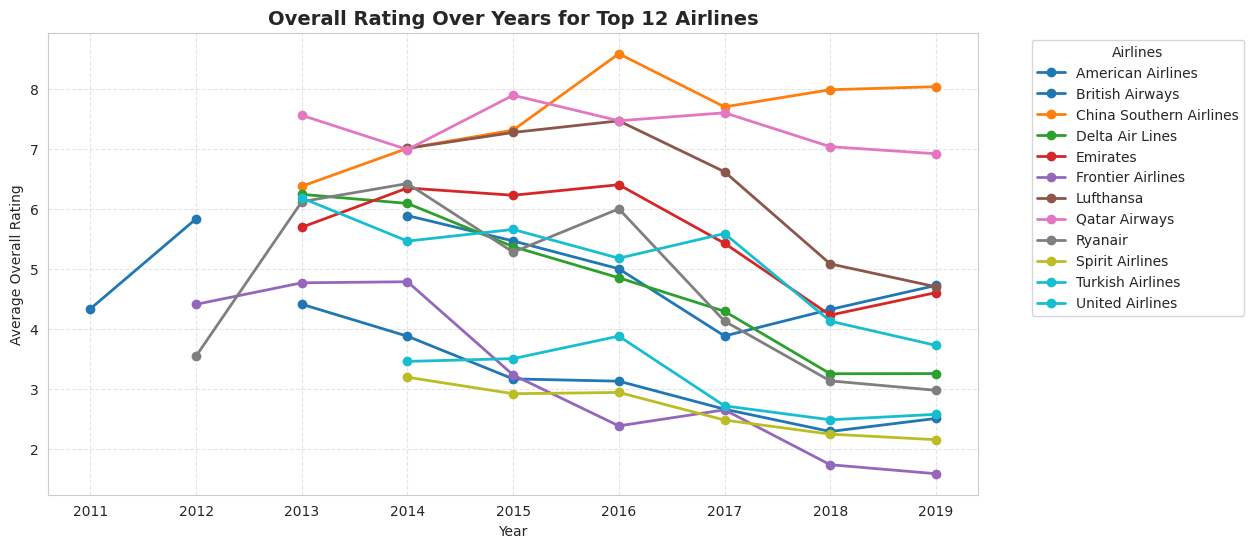

In [90]:
# Convert review_date to datetime and extract the year
df_cleaned['review_date'] = pd.to_datetime(df_cleaned['review_date'])
df_cleaned['year'] = df_cleaned['review_date'].dt.year

# Select top 12 airlines
top_12_airlines = df_cleaned['airline'].value_counts().nlargest(12).index
df_top_12 = df_cleaned[df_cleaned['airline'].isin(top_12_airlines)]

# Aggregate average rating per year per airline
rating_trends = df_top_12.groupby(['year', 'airline'])['overall'].mean().unstack()

# Plot line chart
plt.figure(figsize=(12, 6))
rating_trends.plot(marker='o', colormap='tab10', linewidth=2, figsize=(12, 6))

plt.title("Overall Rating Over Years for Top 12 Airlines", fontsize=14, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Average Overall Rating")
plt.legend(title="Airlines", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


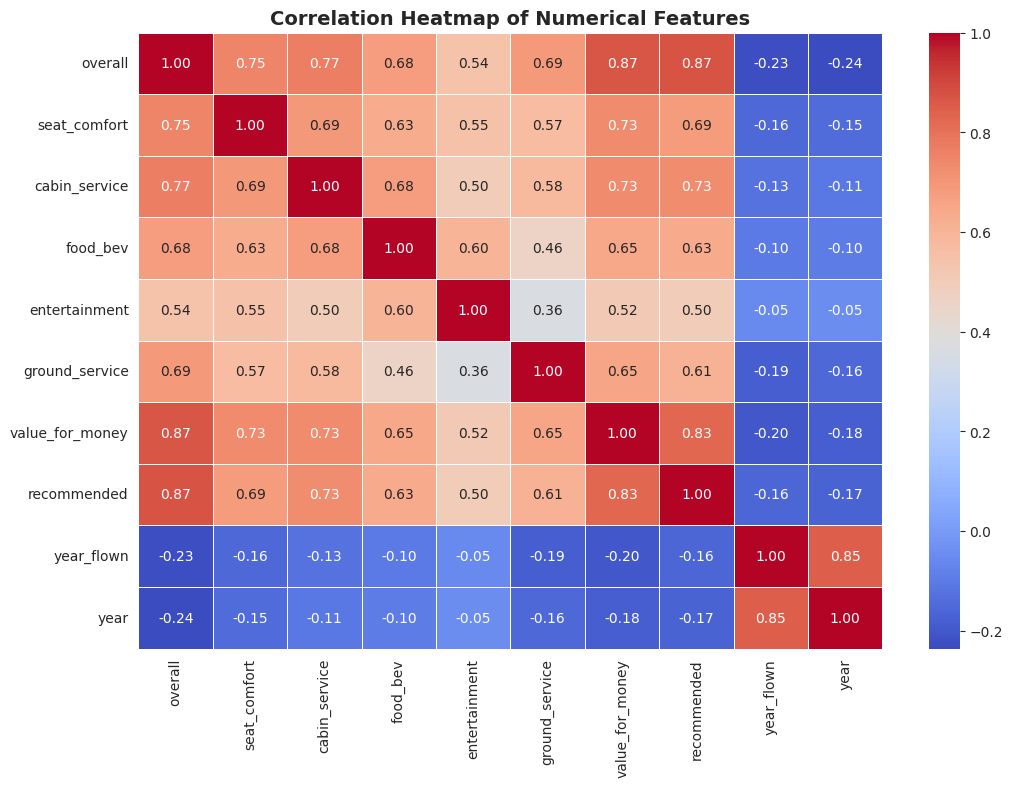

In [96]:
# Select only numerical columns for correlation
numerical_data = df_cleaned.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.show()
